In [2]:
# 確率変数の収束

# 確率変数の列{Xn}がある確率変数Yに「概収束」するとは、n->∞のもと、つまり
# P(lim Xn = Y) = 1が成り立つことと定義する。

# ただし、実際の証明は難しいので、「確率収束」を用いることが多い
# {Xn}がYに確率収束するとは、任意のε>0に対して、
# lim P(|Xn-Y|>ε) = 0 が成り立つことと定義する

# また、{Xn}がYに平均二乗収束するとは、
# lim E[(Xn-Y)**2] = 0 が成り立つことと定義する

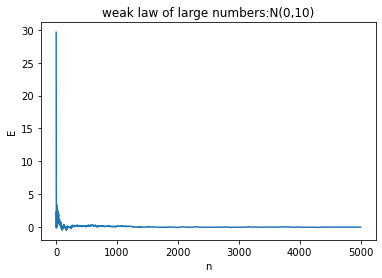

In [5]:
# 大数の弱法則

# {Xn}は独立同一分布に従い、E[Xn]=μ、V[Xn]=σ**2であるとする
# この時、X1, .., Xnの標本平均は、n->∞のもとで、平均二乗収束する
# この定理を大数の弱法則という

import numpy as np
import matplotlib.pyplot as plt

sample_size = 5000
myu = 0
sigma = 10

rv_list = []
mean_list = []
for i in range(sample_size):
    rand_data = np.random.normal(myu, sigma, 1)
    rv_list.append(rand_data)
    mean_list.append(np.mean(rv_list))
plt.plot(np.arange(len(mean_list)),mean_list)
plt.title(f"weak law of large numbers:N({myu},{sigma})")
plt.xlabel("n")
plt.ylabel("E")
plt.show() # nが増えるほど0に収束していくことがわかる

In [6]:
# 確率分布の収束

# 確率変数列{Xn}を考え、Xnの分布関数をFn(x)=P(Xn<=x)を表す
# このとき、{Xn}がある確率分布Gに分布収束あるいは、法則収束するとは
# lim Fn(x) = G(x) という式が、Gのすべての点において成立することと定義する

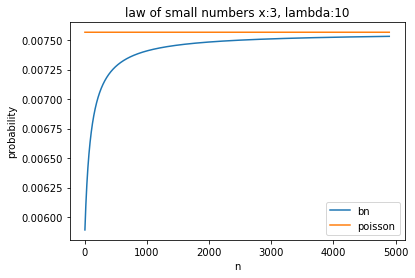

In [13]:
# 少数法則

# 確率変数Xnが試行回数n、成功確率λ/nの二項分布に従うとする
# このときxを固定して、n->∞とするとXnはポワソン分布に分布収束する
# これをポワソンの少数法則という

from cProfile import label
from scipy.stats import binom
from scipy.stats import poisson

lmd = 10
num_start = 100
num_end = 5000

x_num = 3

bn_list = []
for i in range(num_start, num_end):
    f = binom(i, lmd/i)
    y = f.pmf(x_num)
    bn_list.append(y)

prob = poisson.pmf(k=x_num, mu=lmd)

plt.plot(np.arange(len(bn_list)), bn_list, label="bn")
plt.plot(np.arange(len(bn_list)), [prob]*len(bn_list), label="poisson")
plt.title(f"law of small numbers x:{x_num}, lambda:{lmd}")
plt.ylabel("probability")
plt.xlabel("n")
plt.legend()
plt.show() # nが増えるごとにポワソン分布の値に収束していくことがわかる

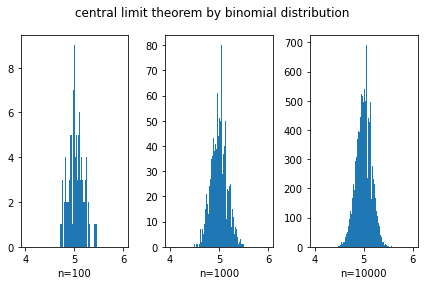

In [27]:
# 中心極限定理

# {Xn}は平均μ、分散σ**2の独立同一分布に従うと仮定する
# またX1,..,Xnの標本平均をXn_avgとあらわす
# このとき、√n*(Xn_avg-μ)は正規分布N(0, σ**2)に分布収束する
# これを中心極限定理という
# 要するに「母集団がどのような分布をしていても、そこから取り出した標本の平均値の分布は、
# 平均を計算する回数が大きくなるにつれて正規分布に近づく」ことを意味する

# 二項分布で実験
start_point = 4
end_point = 6

sample_num = 100

bins1=100
bins2=1000
bins3=10000

mean_list1 = []
for i in range(bins1):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list1.append(mean)

mean_list2 = []
for i in range(bins2):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list2.append(mean)

mean_list3 = []
for i in range(bins3):
    arr = np.random.binomial(10, 0.5, sample_num)
    mean = arr.mean()
    mean_list3.append(mean)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
ax1.hist(mean_list1, range=[start_point, end_point], bins=sample_num)
ax2.hist(mean_list2, range=[start_point, end_point], bins=sample_num)
ax3.hist(mean_list3, range=[start_point, end_point], bins=sample_num)
ax1.set_xlabel(f"n={bins1}")
ax2.set_xlabel(f"n={bins2}")
ax3.set_xlabel(f"n={bins3}")
plt.suptitle("central limit theorem by binomial distribution")
plt.tight_layout()
plt.show()

In [28]:
# 極値分布

# 標本の最大値あるいは最小値が従う分布、およびその極値のことを「極値分布」という
# 収束先としては、ガンベル分布、フレシェ分布、ワイブル分布がある

In [29]:
# 分布収束の性質

# 分布収束に関する便利な性質を3つ述べる
#
# <性質1>
# XnがXに分布収束し、かつhが連続であればh(Xn)はh(X)に分布収束する。(「連続写像定理」)。
# たとえば、XnがN(0,1)に分布収束するならば、Xn**2は自由度1のカイ二乗分布に分布収束する
# 
# <性質2>
# XnがXに分布収束し、かつYnが定数cに確率収束するならば、Xn+YnおよびXn*Ynは
# それぞれX+cおよびc*Xに収束する。(「スルツキーの補題」)
# 
# <性質3>
# Xnのモーメント母関数Mn(t)->M(t)が成り立つならば、Xn->Xに分布収束する

In [37]:
# デルタ法

# {Xn}は平均μ、分散σ**2の独立同一分布に従うと仮定する
# またX1,..,Xnの標本平均をXn_avgとあらわす
# ある関数fを用いて、f(Xn_avg)と表される量を考える
# このとき、√n*(f(Xn_avg)-f(μ))の分布収束先を求める方法が「デルタ法」である
# f(x)が連続微分可能であれば、テイラーの定理から
# f(Xn_avg)-f(μ) ≈ f'(μ)*(Xn_avg-μ) と近似できる
# 中心極限定理から√n*(Xn-μ)はN(0,σ**2)に収束するので、
# 上記を用いて、√n*(f(Xn_avg)-f(μ))はN(0, f'(μ)*σ**2)に分布収束するといえる

def func(x):
    return x**2

def func_diff(x):
    return 2*x

myu = 10
sigama = 1
arr = np.random.normal(myu, sigma, 10000)
mean = arr.mean()

# f(Xn_avg)-f(μ)
left_val = func(mean) - func(myu)

# f'(μ)*(Xn_avg-μ)
right_val = func_diff(myu)*(mean-myu)
print(left_val, right_val) # 近似を確認

-0.33745083527131214 -0.33773599928434095


In [38]:
# 多次元の分布収束

# 多次元の確率変数の場合も分布収束が成立する
# 2次元の確率変数ベクトルの列(X1,Y1),(X2,Y2),..,(Xn,Yn)を考え、
# 累積分布関数をFn(x,y) = P(Xn<=x, Yn<=y)とおく、このとき{(Xn,Yn)}がGに収束するとは
# lim Fn(x,y) = G(x,y) という式がGのすべての連続点において成立することと定義する
# なお、XnとYnが同時に分布収束したとしても、{Xn,Yn}が同時分布に収束するとは限らない
# 周辺分布だけでは、同時分布は特定できないためである。ただし、Xn,Ynが独立であれば収束先も独立となる